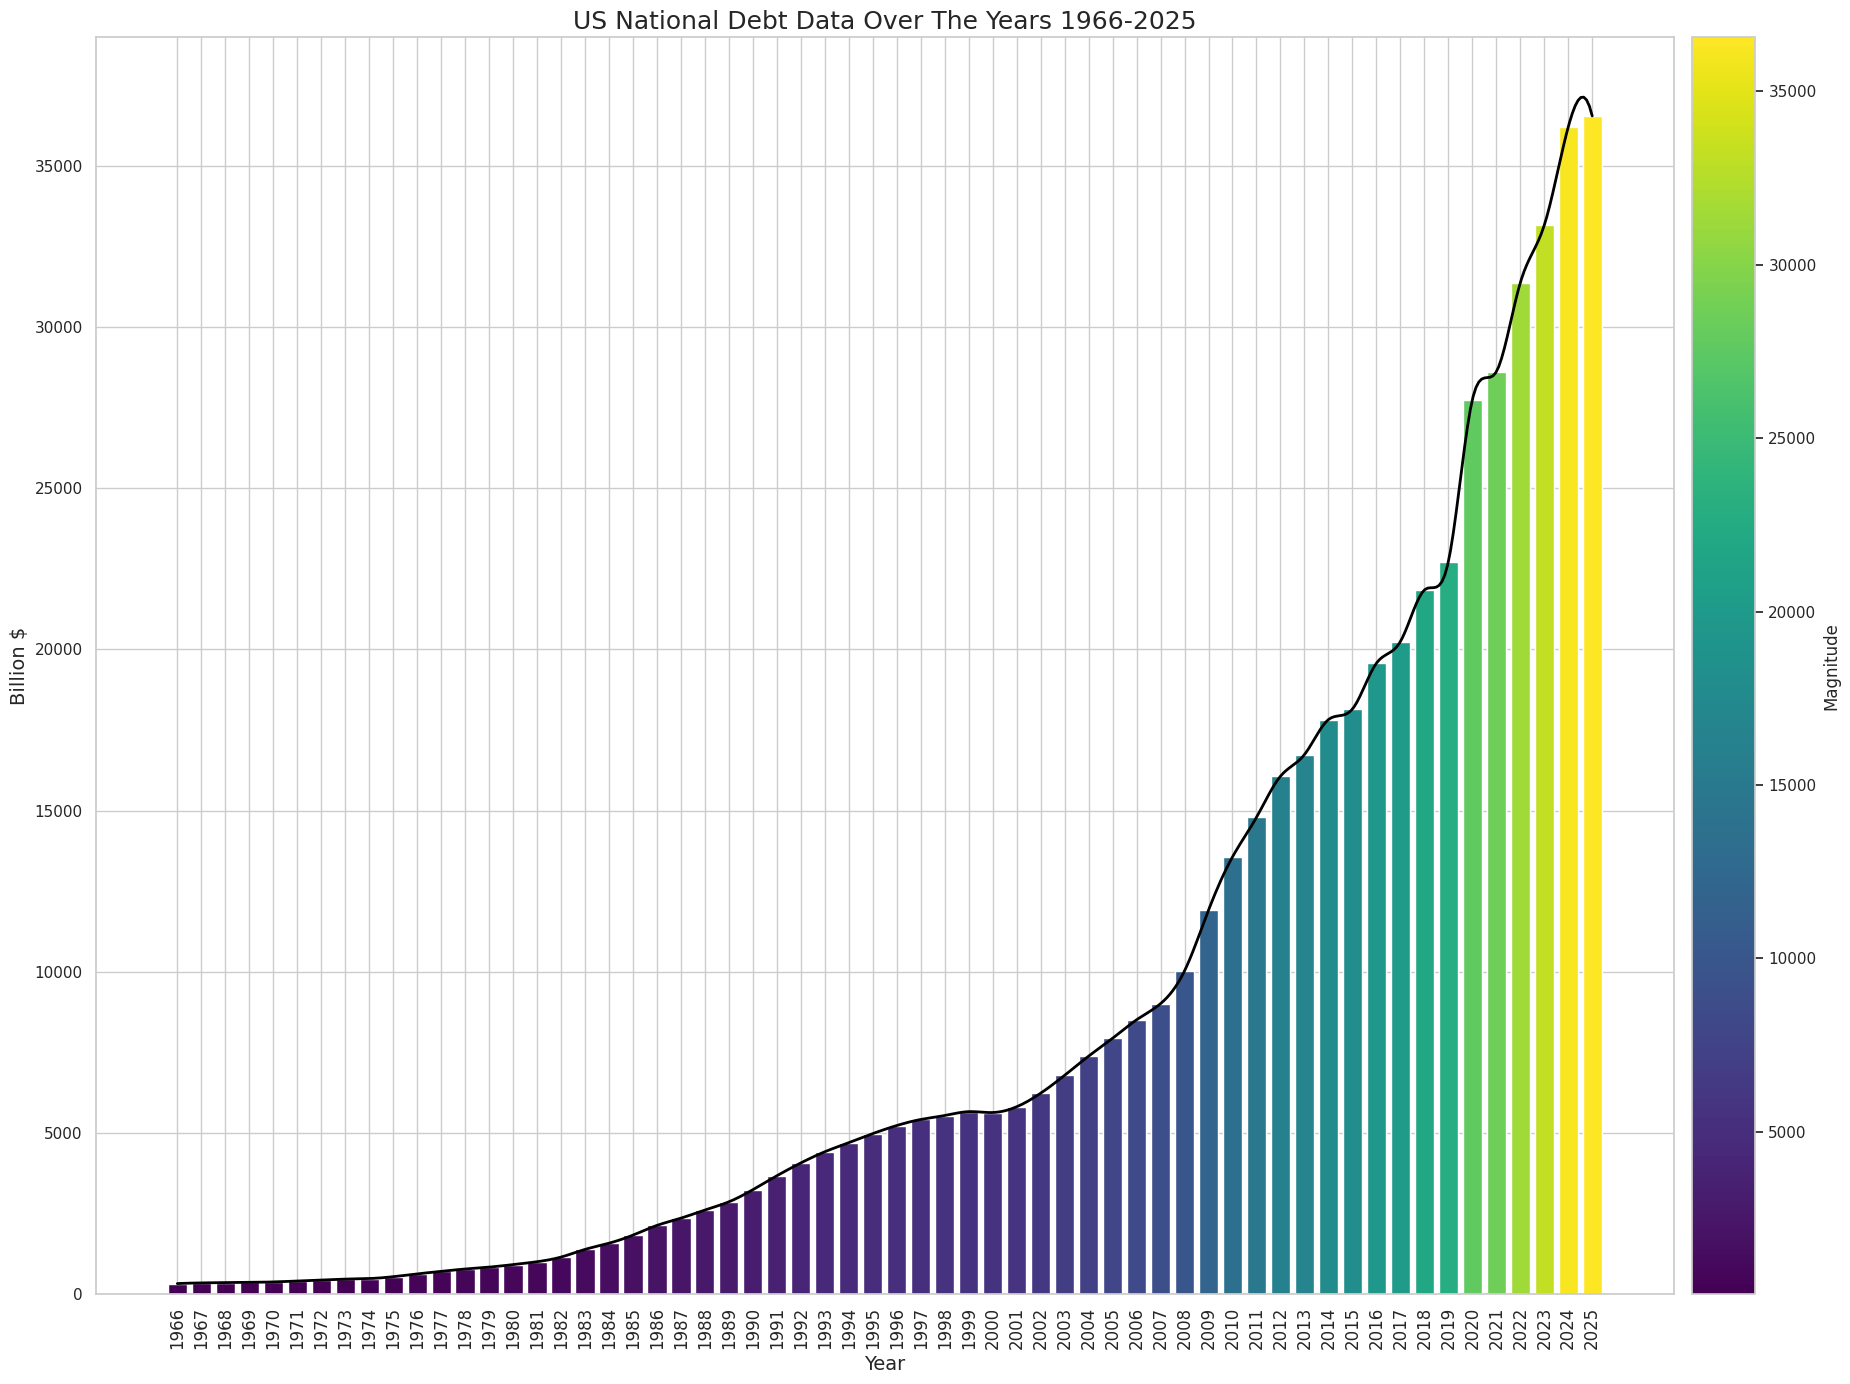

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Full years
years = list(range(1966, 2026))
amount = [320.0, 341.0, 348.0, 354.0, 371.0, 398.0, 427.0, 458.0, 475.0, 533.0,
          620.0, 699.0, 772.0, 830.0, 908.0, 998.0, 1142.0, 1380.0, 1573.0, 1823.0,
          2125.0, 2350.0, 2602.0, 2857.0, 3233.0, 3665.0, 4064.0, 4411.0, 4693.0, 4974.0,
          5225.0, 5413.0, 5536.0, 5656.0, 5629.0, 5807.0, 6228.0, 6783.0, 7379.0, 7933.0,
          8507.0, 9008.0, 10025.0, 11910.0, 13562.0, 14790.0, 16066.0, 16738.0, 17824.0, 18150.0,
          19573.0, 20245.0, 21846.0, 22719.0, 27748.0, 28617.0, 31381.0, 33167.0, 36218.0, 36560.0]

# X positions
x = np.arange(len(years))

# Normalize for colormap
norm = plt.Normalize(min(amount), max(amount))
colors = plt.cm.viridis(norm(amount))

# === Configure figure size here ===
fig_width = 20
fig_height = 14
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# Set style
sns.set(style="whitegrid")

# Bar chart
bars = ax.bar(x, amount, color=colors)

# Smooth line interpolation
x_smooth = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, amount, k=3)
y_smooth = spl(x_smooth)
ax.plot(x_smooth, y_smooth, color='black', linewidth=2)

# Set full year labels with 90° rotation
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, fontsize=12)

# Labels and title
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Billion $", fontsize=14)
ax.set_title("US National Debt Data Over The Years 1966-2025", fontsize=18)

# Colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Magnitude', fontsize=12)

plt.tight_layout()
plt.show()